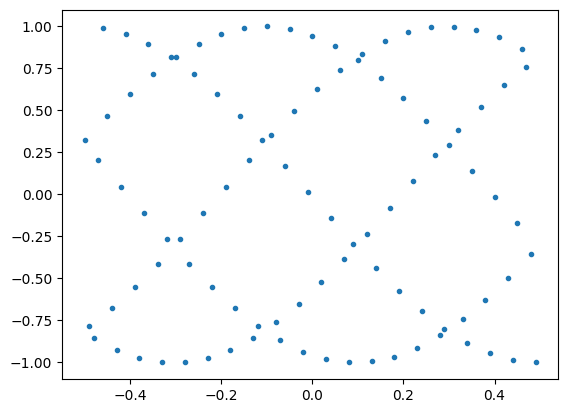

In [14]:
plt.plot(t, x, '.')

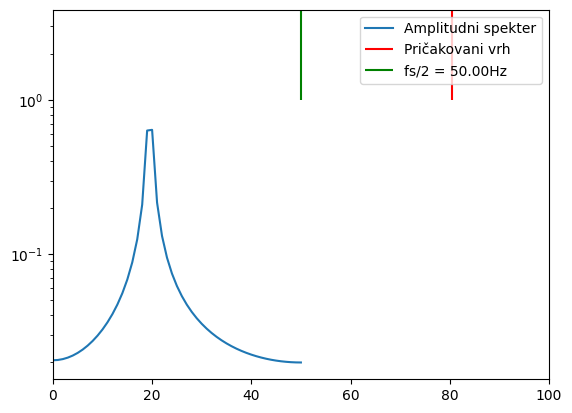

In [12]:
import matplotlib.pyplot as plt
import numpy as np

f = 80.5 # <<<<<<<<<<<<<<<<
T = 1.
N = 100
t, dt = np.linspace(-T/2, T/2, N, endpoint=False, retstep=True)
fs = 1/dt
x = np.cos(2*f*np.pi*t+0.33)

X1=np.fft.rfft(x)*2/len(x)

f1=np.fft.rfftfreq(len(x),dt)
plt.semilogy(f1, np.abs(X1), label='Amplitudni spekter');
plt.vlines(f, 1, 1000, 'r', label='Pričakovani vrh')
plt.vlines(fs/2, 1, 1000, 'g', label=f'fs/2 = {fs/2:3.2f}Hz')
plt.xlim(0, fs/2+50)
plt.legend();

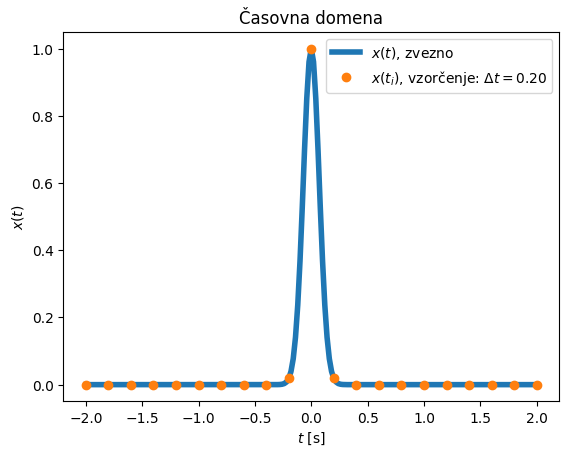

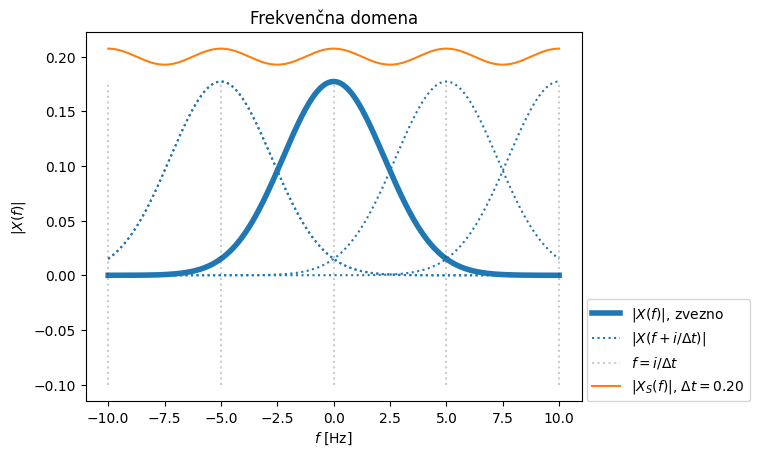

In [17]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np

# navodilo: spreminaj parameter `a`

t, f = sym.symbols('t, f', real=True)
n, Δt = sym.symbols('n, Δt')
a = sym.symbols('a', real=True, positive=True)
x = sym.exp(-a*t**2)
X = sym.fourier_transform(x, t, f)
Xsum = sym.Sum(X.subs(f, f-n/Δt), (n, -10, 10))

podatki = {a: 100, Δt: .2}
# pripravimo vektorizirane funkcije za numpy
f_x = sym.lambdify(t, x.subs(podatki), 'numpy')
f_X_abs = sym.lambdify(f, sym.Abs(X.subs(podatki)), 'numpy')
f_Xsum_abs = sym.lambdify(f, sym.Abs(Xsum.subs(podatki)), 'numpy')

# zaloga vrednosti v času in frekvenci (t_g so 'gosti' podatki za prikaz zvezne funkcije)
N = int(2/podatki[Δt]) # približno število -N, da imamo časovni trak cca [-2,2]
t_g = np.arange(-10*N,10*N+1)*podatki[Δt]/10
n = np.arange(-N,N+1)
t_i = n*podatki[Δt]
K = 2 # koliko sosednijih preslikav X(f) prikažemo
fr = np.linspace(-K/podatki[Δt],K/podatki[Δt], num=500)

plt.title('Časovna domena')
plt.plot(t_g, f_x(t_g), 'C0', label='$x(t)$, zvezno', linewidth=4)
plt.plot(t_i, f_x(t_i), color='C1', marker='o', ls='', label=f'$x(t_i)$, vzorčenje: $\\Delta t=${podatki[Δt]:3.2f}')
plt.xlabel('$t$ [s]')
plt.ylabel('$x(t)$')
plt.legend()
plt.show()

plt.title('Frekvenčna domena')
plt.plot(fr, f_X_abs(fr), 'C0', label='$|X(f)|$, zvezno', linewidth=4)
for i in range(-K,K):
    plt.plot(fr, f_X_abs(fr+i/podatki[Δt]), 'C0', ls=':')
    plt.vlines(i/podatki[Δt], -0.1, np.max(f_X_abs(fr)), 'k', ls=':', alpha=0.2)
plt.plot(fr, f_X_abs(fr+i/podatki[Δt]), 'C0', ls=':', label='$|X(f+i/\\Delta t)|$')
plt.vlines((i+1)/podatki[Δt], -0.1, np.max(f_X_abs(fr)), 'k', ls=':', alpha=0.2, label='$f=i/\\Delta t$')
plt.plot(fr, f_Xsum_abs(fr), color='C1', label=f'$|X_S(f)|$, $\\Delta t=${podatki[Δt]:3.2f}')
plt.xlabel('$f$ [Hz]')
plt.ylabel('$|X(f)|$')
plt.legend(loc=(1.01,0))
plt.show()

In [17]:
import numpy as np

A = 1
fr = 5
fs = 100 
N = 101
# spodnja fs rezultira v vključenost zadnje točke. Rezultat bo napačen!
#fs = 100/1.01010101010101
dt = 1/fs
t = np.arange(N)*dt
x = A*np.sin(2*np.pi*fr*t)

X_r = np.fft.rfft(x)
freq_r = np.fft.rfftfreq(len(x), d=dt)

In [18]:
t[-3:]

array([0.98, 0.99, 1.  ])

In [19]:
np.arange(N//2+1)[freq_r==fr]

array([], dtype=int32)

In [20]:
c = X_r[5] / len(x)
c

(0.07674095917193707-0.48944880718466754j)

In [21]:
freq_r[5]

4.9504950495049505

In [64]:
import numpy as np

A = 1
fr = 5
fs = 100 
N = 100
dt = 1/fs
t = np.arange(N)*dt
x = A*np.sin(2*np.pi*fr*t)

X = np.fft.fft(x)
freq = np.fft.fftfreq(len(x), d=dt)

In [65]:
t[-3:]

array([0.97, 0.98, 0.99])

In [66]:
import matplotlib.pyplot as plt

In [67]:
x[:2]

array([0.        , 0.30901699])

In [68]:
x[-2:]

array([-0.58778525, -0.30901699])

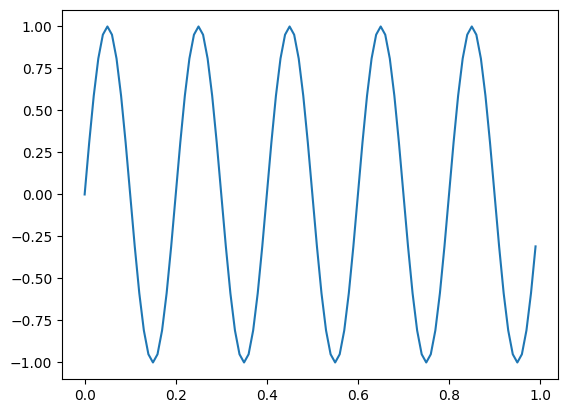

In [69]:
plt.plot(t, x);

In [75]:
X = np.fft.rfft(x)
freq = np.fft.rfftfreq(len(x), d=dt)

In [76]:
freq

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

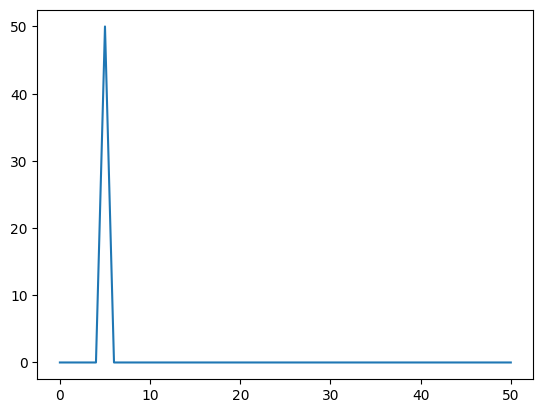

In [77]:
plt.plot(np.abs(X));

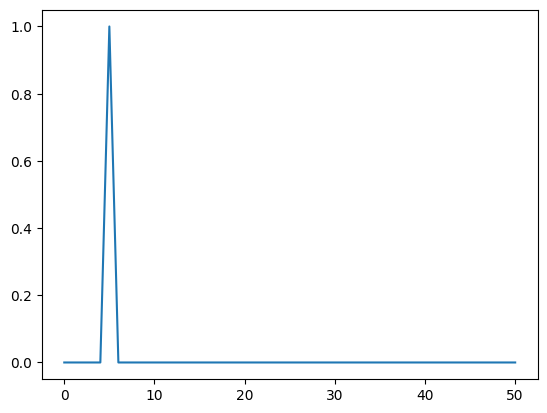

In [79]:
plt.plot(freq, 2*np.abs(X)/N);

In [74]:
(X[freq==fr]/N, np.angle(X[freq==fr]/N))

(array([-1.62040942e-16-0.5j]), array([-1.57079633]))

In [62]:
X[freq==fr]/N

array([0.42073549-0.27015115j])

In [63]:
X[freq==-fr]/N

array([-0.42073549+0.27015115j])

In [80]:
freq

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

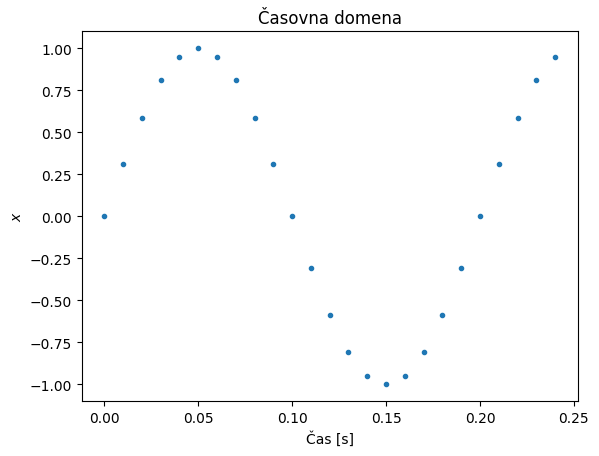

In [82]:
import numpy as np
import matplotlib.pyplot as plt


A = 1
fr = 5
fs = 100 
N = 25 # tukaj poskusite z 20 (sinusuida se zaključi; rezultat brez dodajanja niče je točen!)
k = 10 # dodajanje ničel
dt = 1/fs
t = np.arange(N)*dt
x = A*np.sin(2*np.pi*fr*t)

X = np.fft.fft(x)
freq = np.fft.fftfreq(len(x), d=dt)

X_kx = np.fft.fft(x, n=k*N)
freq_kx = np.fft.fftfreq(k*N, d=dt)


plt.title('Časovna domena')
plt.plot(t, x, '.')
plt.xlabel('Čas [s]')
plt.ylabel('$x$')
plt.show()

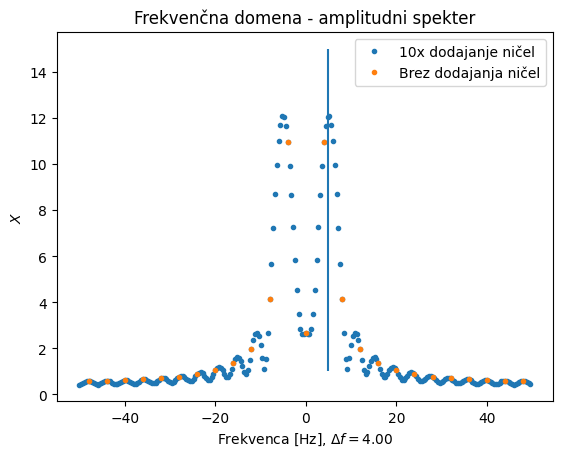

In [87]:
plt.title('Frekvenčna domena - amplitudni spekter')
plt.plot(freq_kx, np.abs(X_kx), '.', label=f'{k}x dodajanje ničel')
plt.plot(freq, np.abs(X), '.', label='Brez dodajanja ničel')
plt.vlines(5, 1, 15)
plt.xlabel(f'Frekvenca [Hz], $\\Delta f=${1/(N*dt):3.2f}')
plt.ylabel('$X$')
plt.legend()
plt.show()

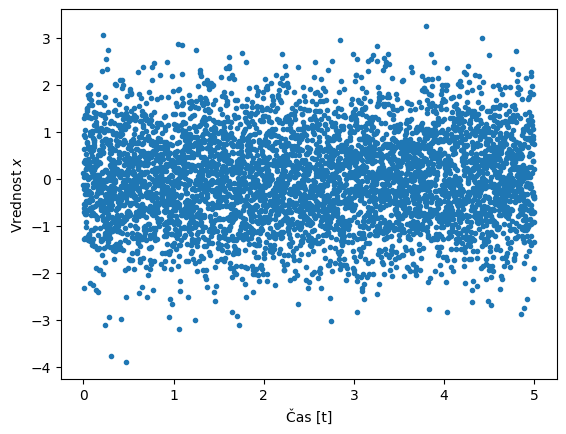

In [2]:
import numpy as np
from scipy.signal import welch 
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)
N = 5000
fs = 1000
dt = 1./fs
x = rng.normal(size=N)
time = np.arange(N)*dt
T = dt*N
plt.plot(time, x, '.')
plt.xlabel('Čas [t]')
plt.ylabel('Vrednost $x$')
plt.show()

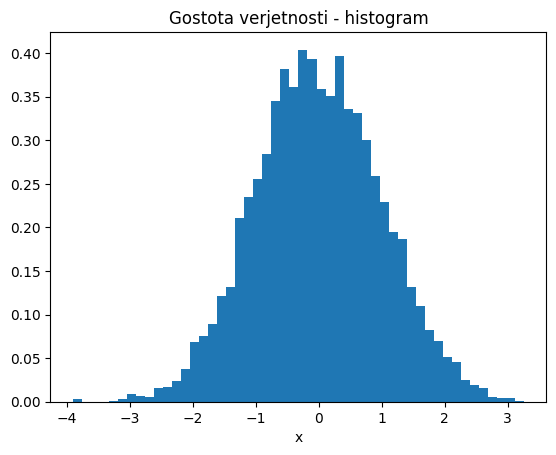

In [7]:
plt.title('Gostota verjetnosti - histogram')
plt.xlabel('x')
plt.hist(x, bins=50, density=True)
plt.show()

In [8]:
X = np.fft.fft(x)/N
freq = np.fft.fftfreq(N, d=dt)
scale = 1.0 * N / fs # skaliranje na gostoto
Sxx = X.conj()*X * scale

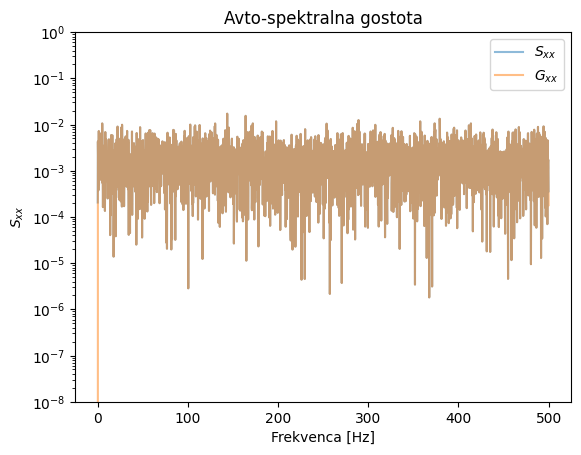

In [10]:
X_r = np.fft.rfft(x)/N
freq_r = np.fft.rfftfreq(N, d=dt)
Gxx = 2*X_r.conj()*X_r * scale

# alternativen izračun prek Scipy (tako se dejansko dela pozneje:))
freq2, Gxx2 = welch(x, window=np.ones_like(x), fs=fs,)

plt.title('Avto-spektralna gostota')
plt.semilogy(freq2, np.abs(Gxx), alpha=0.5, label='$S_{xx}$')
plt.semilogy(freq2, np.abs(Gxx2), alpha=0.5, label='$G_{xx}$')
plt.ylim(1e-8,1e0)
plt.legend()
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('$S_{xx}$')
plt.show()

In [13]:
np.real(Gxx[:5])

array([0.00020541, 0.00428574, 0.00180047, 0.00159644, 0.00037823])

In [12]:
Gxx2[:5]

array([1.45402842e-33, 4.28574344e-03, 1.80047491e-03, 1.59644160e-03,
       3.78226124e-04])

In [20]:
freq3, Gxx3 = welch(x,fs=fs,nperseg=fs/5,noverlap=fs/5/2)

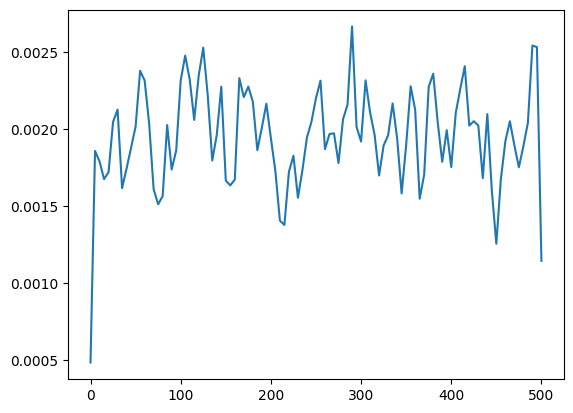

In [21]:
plt.plot(freq3, Gxx3)

In [22]:
freq3[:4]

array([ 0.,  5., 10., 15.])

In [17]:
freq2[:4]

array([0. , 0.2, 0.4, 0.6])

In [24]:
print('Integral v času: ', np.trapz(x*x, dx=dt)/(N/fs), '\n',
      ', integral PSD (Sxx): ', np.trapz(np.real(Sxx), dx=1/(N/fs)), '\n',
      ', integral PSD (Gxx): ', np.trapz(np.real(Gxx), dx=1/(N/fs)),'\n',
      ', integral PSD (Gxx) Welch: ', np.trapz(np.real(Gxx2), dx=1/(N/fs)))

Integral v času:  0.9904720416233659 
 , integral PSD (Sxx):  0.9906062124167658 
 , integral PSD (Gxx):  0.990830770222994 
 , integral PSD (Gxx) Welch:  0.9907922407740426
